<a href="https://colab.research.google.com/github/Mary-prh/Possum-Regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# **Import data**

In [2]:
import pandas as pd

**Data from github should be read using "raw" data**

In [3]:
possum_data = pd.read_csv('https://raw.githubusercontent.com/Mary-prh/Possum-Regression/main/possum.csv',index_col=0)

In [4]:
possum_data.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


# **Explore Data**

In [5]:
possum_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 1 to 104
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 11.4+ KB


In [6]:
possum_data.isna().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [7]:
possum_data.dropna(inplace= True)

In [8]:
possum_data.isna().sum()

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
possum_data["Pop"].value_counts()

other    58
Vic      43
Name: Pop, dtype: int64

In [10]:
import seaborn as sns

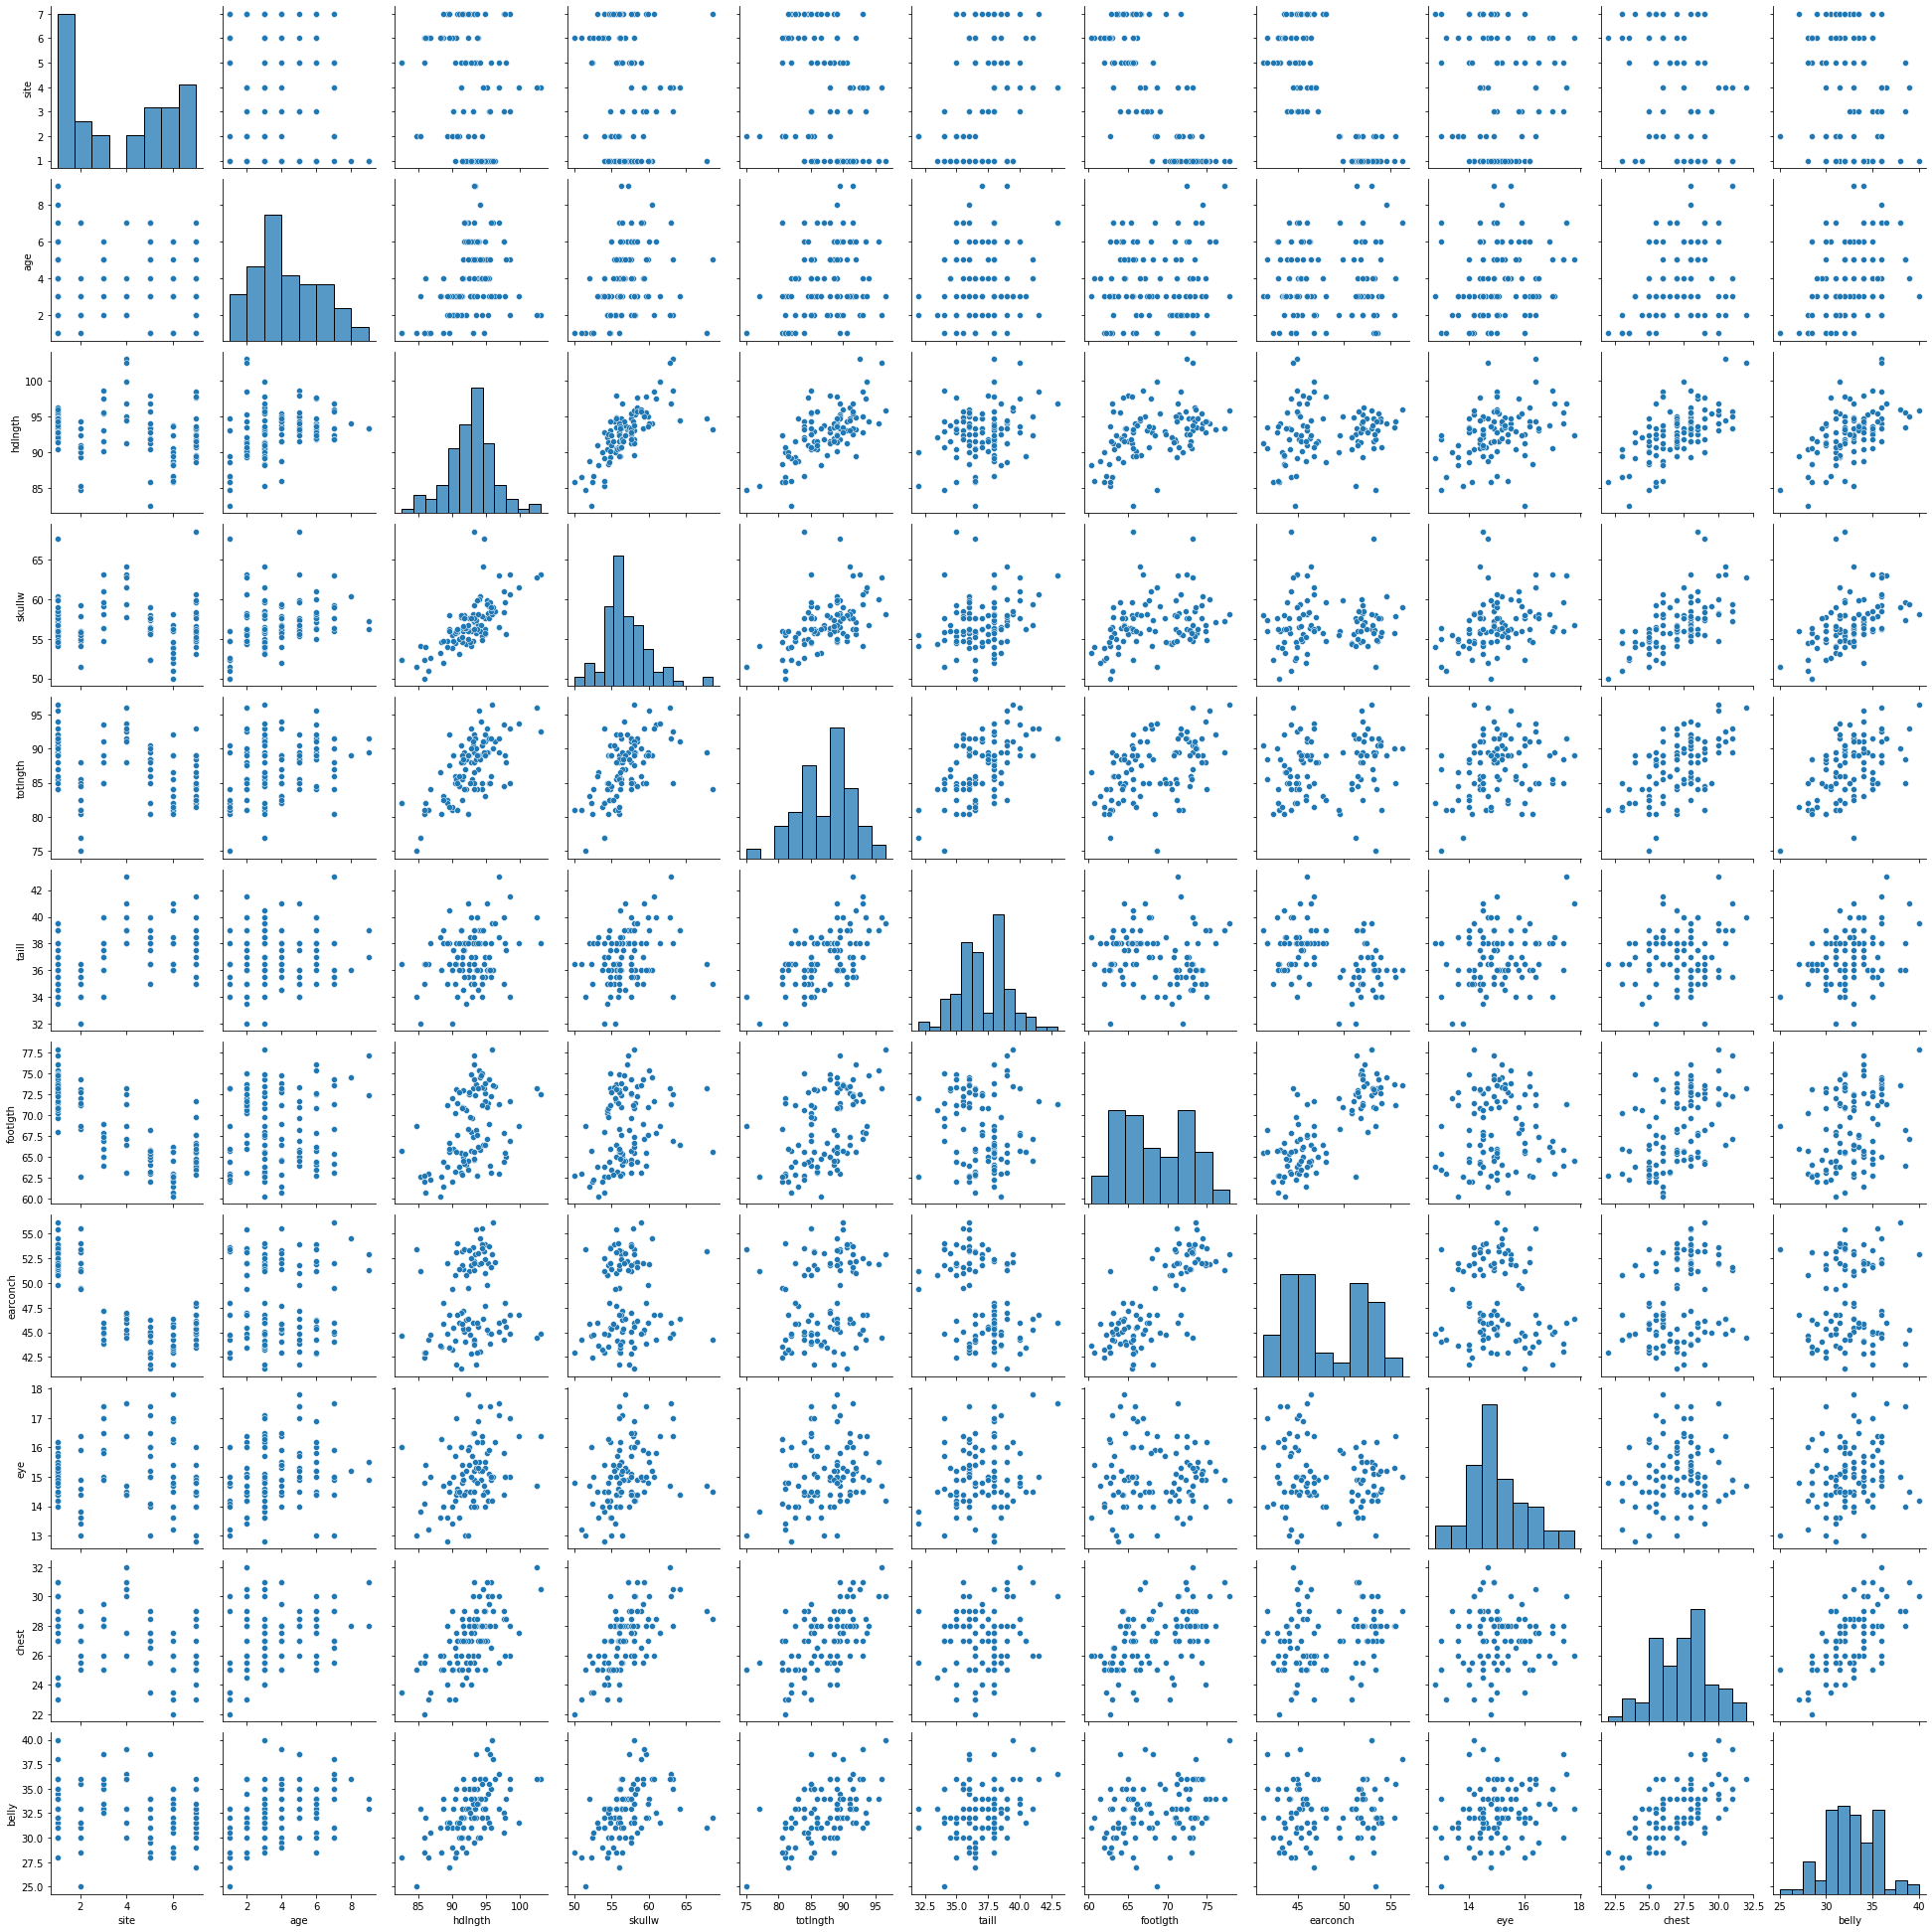

In [11]:
from operator import pos
sns.pairplot(possum_data)

In [12]:
possum_data.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


# **Preprocessing**

## **Create Training and Test Data**

In [13]:
from sklearn.model_selection import train_test_split

X = possum_data.drop('age', axis = 1)
y = possum_data['age']

X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size = 0.2 , 
                                                       random_state= 42)

In [14]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(80, 80, 21, 21)

## **Creating Pipeline**
*   **Normalization** >> range of 0 to 1
*   **oneHotEncoding** for the non-numerical columns.




In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler

In [16]:
transformer_norm = make_column_transformer((MinMaxScaler(), ['site' , 'hdlngth' , 'skullw',
                                                            'totlngth', 'taill', 'footlgth', 
                                                            'earconch', 'eye' , 'chest', 'belly']),
                                           (OneHotEncoder(handle_unknown= 'ignore'), ['Pop', 'sex']))

X_train_normal = transformer_norm.fit_transform(X_train)
X_test_normal = transformer_norm.transform(X_test)

In [17]:
X_train.iloc[0]

site            7
Pop         other
sex             m
hdlngth      89.2
skullw       54.0
totlngth     82.0
taill        38.0
footlgth     63.8
earconch     44.9
eye          12.8
chest        24.0
belly        31.0
Name: 93, dtype: object

In [18]:
X_train_normal[0]

array([1.        , 0.32524272, 0.21505376, 0.3255814 , 0.54545455,
       0.19886364, 0.24161074, 0.        , 0.22222222, 0.4       ,
       0.        , 1.        , 0.        , 1.        ])

In [19]:
X_train_normal.shape , y_train.shape

((80, 14), (80,))

# **Create Model**

## **Model_1**

### **Create, Compile, Fit**

In [139]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1)
])

In [140]:
model_1.compile(optimizer= 'Adam', loss = 'mae', metrics = ['mae'])

In [141]:
history_1 = model_1.fit(X_train_normal , y_train , epochs = 100,
                        verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

### **Evaluation**

In [142]:
preds_1 = model_1.predict(X_test_normal)
preds_1.shape , y_test.shape

((21, 1), (21,))

In [143]:
result_1 = model_1.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 1.6081 - mae: 1.6081


*These two are the same:*

In [144]:
round(result_1[1], 5)

1.60812

In [145]:
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(preds_1)).numpy()
mae_1

1.6081207

### **Result Visualization**

In [146]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1500      
                                                                 
 dense_31 (Dense)            (None, 30)                3030      
                                                                 
 dense_32 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
_________________________________________________________________


In [147]:
hist_1 = pd.DataFrame(history_1.history)

In [148]:
hist_1.head()

,loss,mae,val_loss,val_mae
0,2.905626,2.905626,2.180897,2.180897
1,2.417126,2.417126,1.641829,1.641829
2,2.004689,2.004689,1.228163,1.228163
3,1.682022,1.682022,1.154381,1.154381
4,1.532668,1.532668,1.303369,1.303369


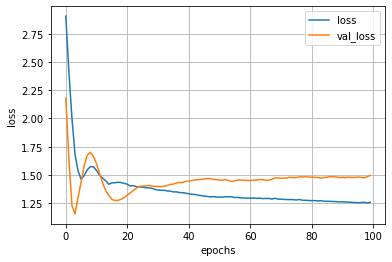

In [26]:
import matplotlib.pyplot as plt

hist_1[['loss', 'val_loss']].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.grid(True)

## **Model_2**

### **Create Callbacks**

In [79]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [80]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=2,
                                                 verbose= 1,
                                                 min_lr = 1e-7)

In [81]:
checkpoint_path = 'model_checkpoints/cp_2.ckpt'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                      save_weights_only= True,
                                                      save_best_only= True,
                                                      monitor= 'val_loss')

### **Create, Compile, Fit**

In [82]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(1)
])

In [83]:
model_2.compile('Adam', loss = 'mae', 
                metrics = ['mae'])

In [84]:
history_2 = model_2.fit(X_train_normal, y_train, epochs = 100, 
                        validation_split = 0.2, 
                        callbacks = [early_stopping, reduce_lr, model_checkpoint])

Epoch 1/100
2/2 [==============================] - 1s 156ms/step - loss: 2.9056 - mae: 2.9056 - val_loss: 2.1809 - val_mae: 2.1809 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 2.4171 - mae: 2.4171 - val_loss: 1.6418 - val_mae: 1.6418 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 2.0047 - mae: 2.0047 - val_loss: 1.2282 - val_mae: 1.2282 - lr: 0.0010
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 1.6820 - mae: 1.6820 - val_loss: 1.1544 - val_mae: 1.1544 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 1.5327 - mae: 1.5327 - val_loss: 1.3034 - val_mae: 1.3034 - lr: 0.0010
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 1.4666 - mae: 1.4666
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2/2 [==============================] - 0s 33ms/step - loss: 1.4611 - mae: 1.4611 - val_loss: 1.4386 - val_mae: 1.4386 -

### **Evaluation**

In [103]:
preds_2 = model_2.predict(X_test_normal)

In [104]:
result_2 = model_2.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 1.7073 - mae: 1.7073


In [115]:
mae_2 = tf.metrics.mean_absolute_error(y_test , tf.squeeze(preds_2)).numpy()
mae_2

1.7073379

### **Result Visualization**

In [130]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               1500      
                                                                 
 dense_19 (Dense)            (None, 30)                3030      
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
_________________________________________________________________


In [85]:
model_2.load_weights(checkpoint_path)

In [86]:
for layer in model_2.layers:
  print(layer.name, layer)

dense_18 <keras.layers.core.dense.Dense object at 0x7f93d323ca10>
dense_19 <keras.layers.core.dense.Dense object at 0x7f93d322f290>
dense_20 <keras.layers.core.dense.Dense object at 0x7f93d324ae50>


In [87]:
print(model_2.layers[0].weights[0])

<tf.Variable 'dense_18/kernel:0' shape=(14, 100) dtype=float32, numpy=
array([[ 0.06778537, -0.03419179, -0.07534102, ..., -0.19350961,
        -0.19753593,  0.04948636],
       [-0.06722119, -0.00080343,  0.0486614 , ...,  0.10260605,
         0.05076064, -0.02018239],
       [ 0.13712785,  0.21416959,  0.12698947, ..., -0.09312952,
         0.11125093, -0.22028494],
       ...,
       [-0.22596978,  0.11860799, -0.00838225, ...,  0.08938081,
        -0.20495993,  0.19451013],
       [-0.16396241, -0.18092465, -0.11200593, ..., -0.2321417 ,
         0.00351424, -0.11585538],
       [ 0.05148459,  0.08561825, -0.06639583, ...,  0.04239389,
        -0.17605233, -0.16328578]], dtype=float32)>


In [88]:
import numpy as np

# plt.plot(np.array(model_2.layers[0].weights[0]))

In [89]:
print(model_2.layers[0].bias)

<tf.Variable 'dense_18/bias:0' shape=(100,) dtype=float32, numpy=
array([-0.00777176, -0.00713144, -0.00790707, -0.00778786, -0.00775186,
       -0.00782432,  0.00785954,  0.00768302, -0.00726767, -0.00778887,
       -0.00781033,  0.00797588, -0.00797032, -0.00795827,  0.00782211,
        0.00782253,  0.00248281, -0.00798216, -0.00773748, -0.00066518,
       -0.00782147,  0.00750179, -0.0079653 ,  0.00763437, -0.00767537,
        0.00762694,  0.00796265, -0.00790889,  0.00792837,  0.00762241,
        0.00777669, -0.00780961,  0.00797388, -0.00780654, -0.00353894,
        0.00713171, -0.00280996, -0.00780124,  0.00797515,  0.00782706,
       -0.00778911, -0.00601598, -0.00764556, -0.00776835, -0.00780031,
        0.00779221, -0.00280933,  0.007844  ,  0.0079568 , -0.00719759,
        0.00729038,  0.00755337,  0.00780702,  0.00783774,  0.00784247,
        0.00796926, -0.00737139, -0.00782098, -0.00781894,  0.0078987 ,
       -0.00768115, -0.0078161 , -0.00788201,  0.00733714,  0.00747301

In [92]:
print(model_2.layers[0].bias_initializer)

In [90]:
hist_2 = pd.DataFrame(history_2.history)
hist_2

,loss,mae,val_loss,val_mae,lr
0,2.905626,2.905626,2.180897,2.180897,0.001
1,2.417126,2.417126,1.641829,1.641829,0.001
2,2.004689,2.004689,1.228163,1.228163,0.001
3,1.682022,1.682022,1.154381,1.154381,0.001
4,1.532668,1.532668,1.303369,1.303369,0.001
5,1.461101,1.461101,1.438639,1.438639,0.001


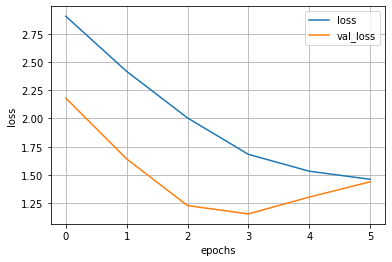

In [91]:
hist_2[['loss', 'val_loss']].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.grid(True)

## **Model_3**

### **Create Callbacks**

In [190]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 2)

### **Create, Coompile, Fit**

In [191]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    # tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'), 
    tf.keras.layers.Dense(1, activation= 'linear')
])

In [192]:
model_3.compile(optimizer= 'Adam', loss = 'mae', 
                metrics = ['mae'])

In [193]:
history_3 = model_3.fit(X_train_normal , y_train, epochs= 200, 
                        validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/200
2/2 [==============================] - 1s 157ms/step - loss: 3.4755 - mae: 3.4755 - val_loss: 2.9928 - val_mae: 2.9928
Epoch 2/200
2/2 [==============================] - 0s 27ms/step - loss: 3.2845 - mae: 3.2845 - val_loss: 2.7877 - val_mae: 2.7877
Epoch 3/200
2/2 [==============================] - 0s 31ms/step - loss: 3.0869 - mae: 3.0869 - val_loss: 2.5699 - val_mae: 2.5699
Epoch 4/200
2/2 [==============================] - 0s 32ms/step - loss: 2.8840 - mae: 2.8840 - val_loss: 2.3455 - val_mae: 2.3455
Epoch 5/200
2/2 [==============================] - 0s 29ms/step - loss: 2.6892 - mae: 2.6892 - val_loss: 2.1170 - val_mae: 2.1170
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 2.4873 - mae: 2.4873 - val_loss: 1.9156 - val_mae: 1.9156
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 2.2993 - mae: 2.2993 - val_loss: 1.7427 - val_mae: 1.7427
Epoch 8/200
2/2 [==============================] - 0s 32ms/step - loss: 2.1282 - mae: 2.1

### **Evaluation**

In [194]:
preds_3 = model_3.predict(X_test_normal)

In [195]:
preds_3.shape , y_test.shape

((21, 1), (21,))

In [196]:
mae_3 = tf.metrics.mean_absolute_error(y_test , tf.squeeze(preds_3)).numpy()
mae_3

1.5795871

### **Result Visualization**

In [197]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 100)               1500      
                                                                 
 dense_44 (Dense)            (None, 30)                3030      
                                                                 
 dense_45 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
_________________________________________________________________


In [198]:
hist_3 = pd.DataFrame(history_3.history)
hist_3

,loss,mae,val_loss,val_mae
0,3.475542,3.475542,2.992769,2.992769
1,3.284523,3.284523,2.787666,2.787666
2,3.086949,3.086949,2.569881,2.569881
3,2.883988,2.883988,2.345486,2.345486
4,2.689227,2.689227,2.117015,2.117015
5,2.487333,2.487333,1.915603,1.915603
6,2.299259,2.299259,1.742669,1.742669
7,2.128163,2.128163,1.583300,1.583300
8,1.965905,1.965905,1.429359,1.429359
9,1.809363,1.809363,1.328389,1.328389


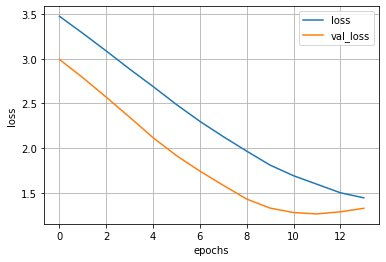

In [199]:
hist_3[['loss', 'val_loss']].plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend()
plt.grid(True)

# **Compare models**

In [200]:
model_results = [['model_1', mae_1],
                ['model_2', mae_2],
                 ['model_3', mae_3]
                ]

In [201]:
compare_results = pd.DataFrame(model_results, columns = ['model', 'mae'])
compare_results

,model,mae
0,model_1,1.608121
1,model_2,1.707338
2,model_3,1.579587


# **Save Model**

In [202]:
model_3.save("Model_3.h5")

In [203]:
!ls Model_3.h5

Model_3.h5


In [204]:
loaded_saved_model = tf.keras.models.load_model("Model_3.h5")
loaded_saved_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 100)               1500      
                                                                 
 dense_44 (Dense)            (None, 30)                3030      
                                                                 
 dense_45 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
_________________________________________________________________


In [176]:
h5_model_preds = loaded_saved_model.predict(X_test_normal)

In [180]:
mae_h5 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(h5_model_preds)) .numpy()

In [181]:
mae_h5 == mae_3

True

## **Downloading a model (from Google Colab)**

In [182]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("Model_3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>